# Diabetes Prediction Project

* About the Dataset

The dataset used for this project is the Lung Cancer Detection Dataset, which is collected from the https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

* Total no. of attributes: 9
* No .of instances: 100000
* Attribute information: 
1. Gender: Male, Female
2. Age: Age of the patient 
3. Hypertension: YES=1, NO=0. 
4. Heart Disease: YES=1 ,NO=0. 
5. Somking object data
6. BMI: continuous Data
7. HBA1c_level: float data
8. FatiBlood gluecose: Continous
9. Diabetes: YES=1, NO=0.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Loading Data

In [3]:
df = pd.read_csv("./diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Getting Insight of the Data

In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.groupby("diabetes").count()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,91500,91500,91500,91500,91500,91500,91500,91500
1,8500,8500,8500,8500,8500,8500,8500,8500


In [8]:
print(df.isna().sum())
print(df.duplicated().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
3854


* Dataset not having NULL or NAN value but have duuplicate values

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.groupby("smoking_history")["diabetes"].count()

smoking_history
No Info        32887
current         9197
ever            3998
former          9299
never          34398
not current     6367
Name: diabetes, dtype: int64

* Conclusing that those who never smoked and those data having no info has more chance of being diabetics
* we have to interprete the smoke_history data from categorical to numerical

* 1 -- No Info
* 2 -- Current
* 3 -- Ever
* 4 -- Former
* 5 -- Never
* 6 -- Not Current

In [13]:
df["gender"] = df["gender"].replace(["Male", "Female"],[0,1])
df["smoking_history"] = df["smoking_history"].replace(
    ["No Info","current","ever","former","never","not current"], [1,2,3,4,5,6])

0 for Male and 1 for Female in df

In [14]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,5,25.19,6.6,140,0
1,1,54.0,0,0,1,27.32,6.6,80,0
2,0,28.0,0,0,5,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0


## Visualization of the data

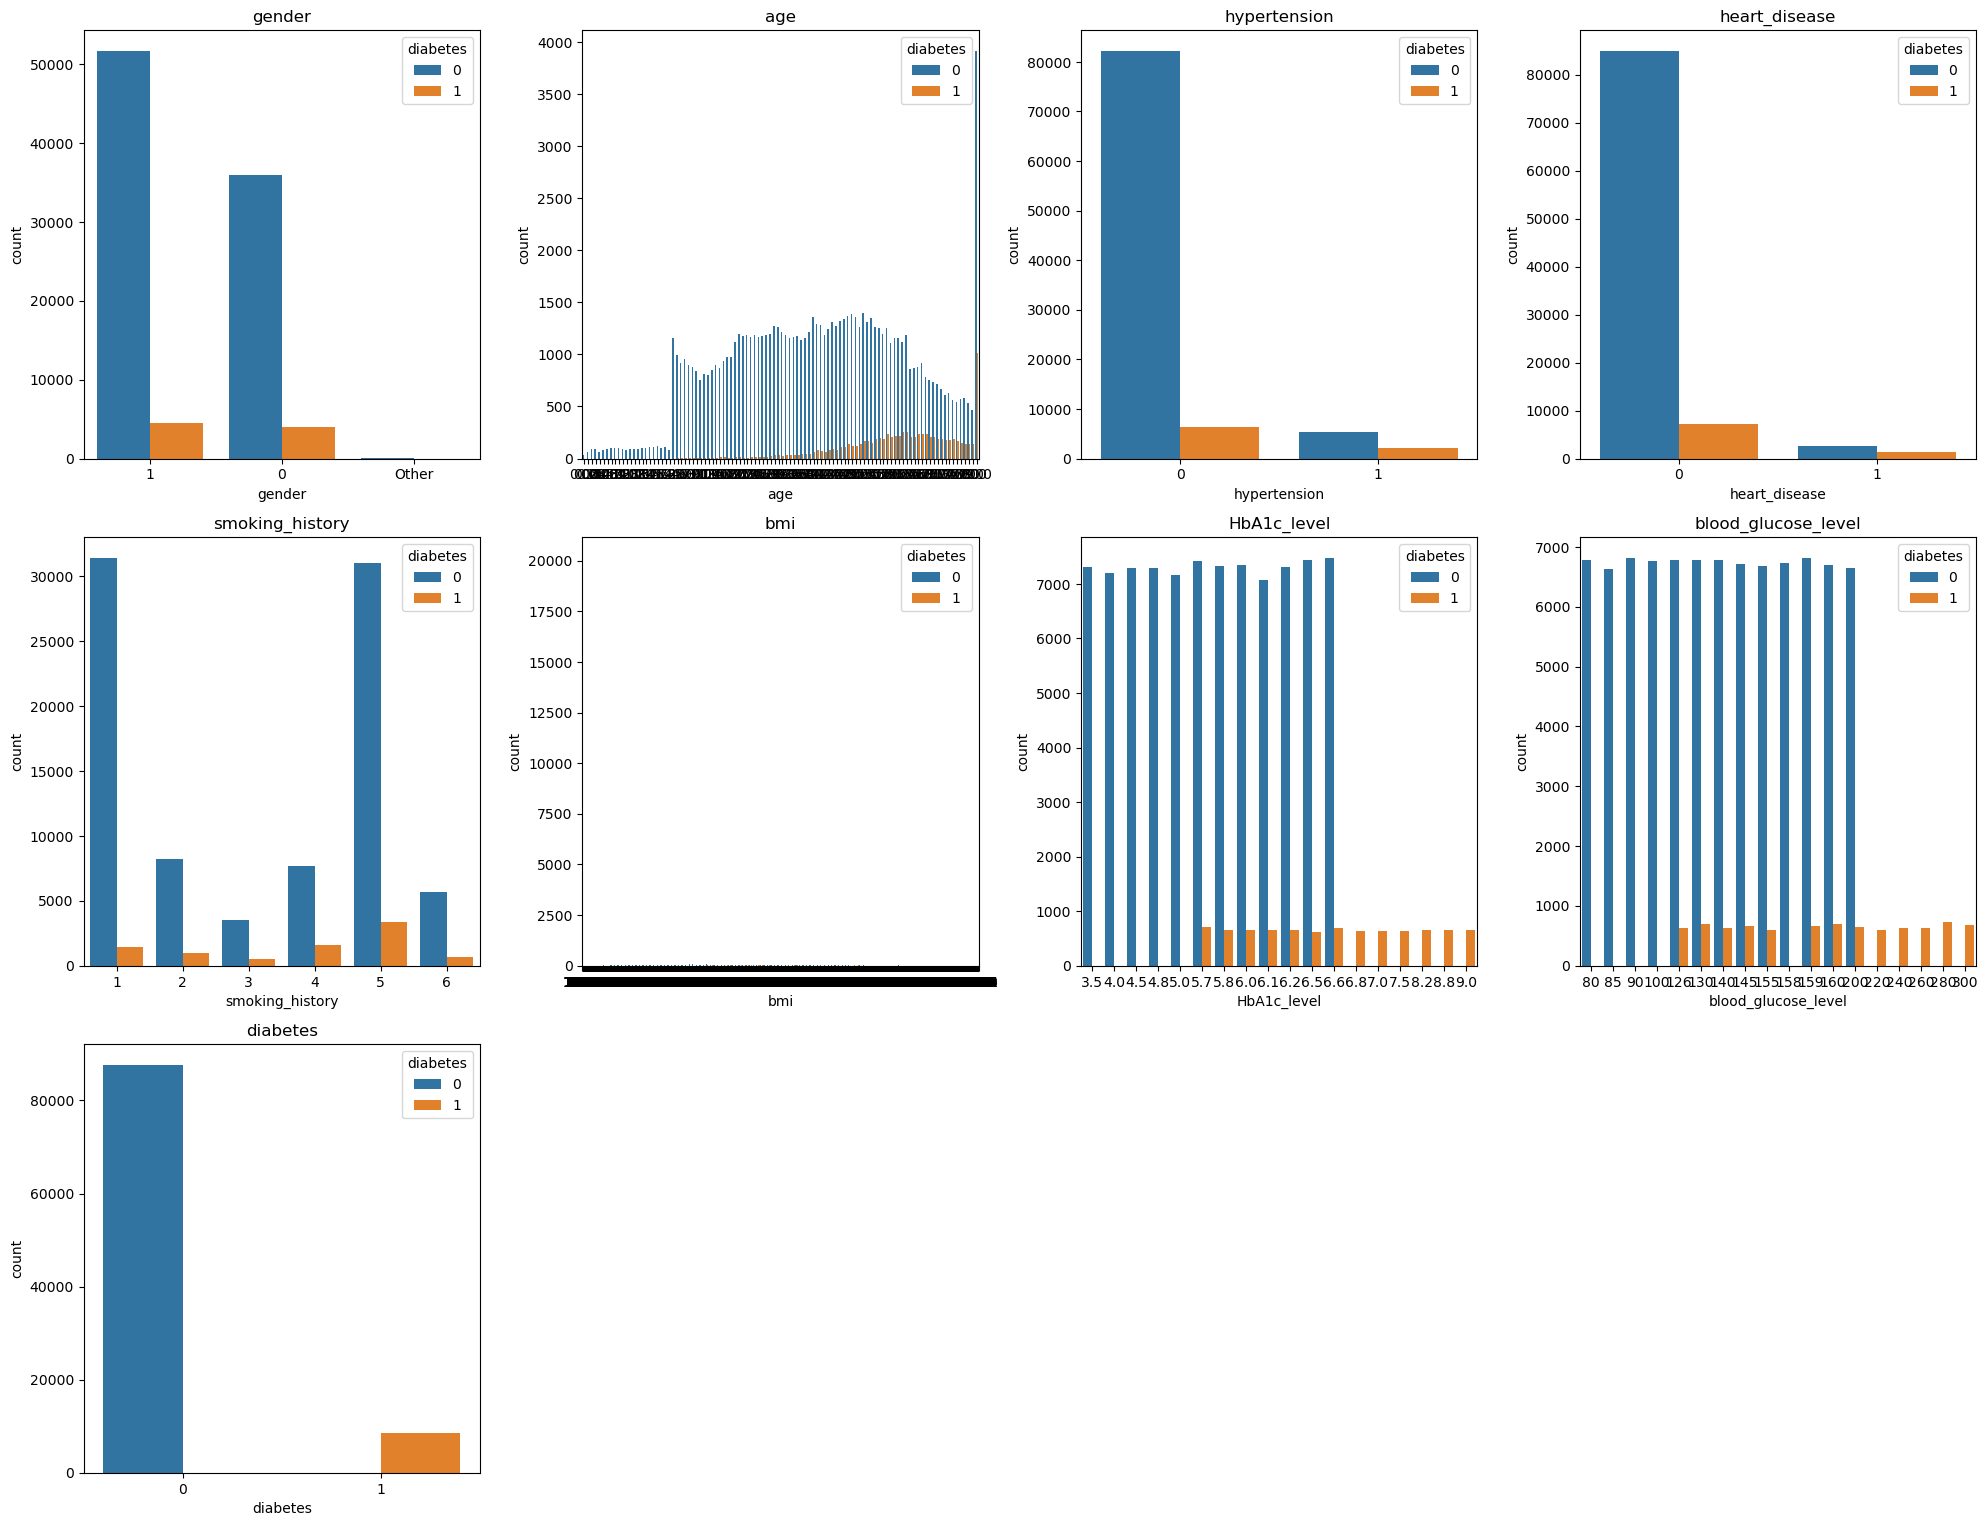

In [16]:
list=df.columns.tolist()
plt.figure(figsize=(20,20))
for i in range(len(list)):
    plt.subplot(4,4,i+1)
    plt.title(list[i])
    sns.countplot(data=df,x=list[i],hue="diabetes")
plt.tight_layout()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18532\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

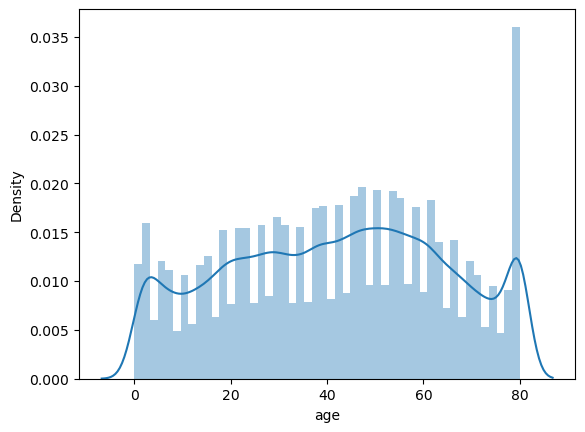

In [17]:
sns.distplot(df['age'])

In [1]:
list=df.columns.tolist()
plt.figure(figsize=(20,20))
for i in range(len(list)):
    plt.subplot(4,4,i+1)
    plt.title(list[i])
    sns.histplot(data=df,x=list[i],hue="diabetes")
plt.tight_layout()

NameError: name 'df' is not defined